In [160]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('../data/game_chars.csv')
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          563 non-null    object 
 1   URL           563 non-null    object 
 2   Image fName   563 non-null    object 
 3   Image Height  563 non-null    float64
 4   Image Width   563 non-null    float64
 5   Image URL     563 non-null    object 
 6   Alignment     563 non-null    object 
dtypes: float64(2), object(5)
memory usage: 30.9+ KB


In [10]:
df.loc[df['Alignment'] == "True Neutral"]

,Name,URL,Image fName,Image Height,Image Width,Image URL,Alignment
1,Abomasnow,https://characterprofile.fandom.com/wiki/Aboma...,Abomasnow.png,250.0,250.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
13,Amoonguss,https://characterprofile.fandom.com/wiki/Amoon...,Amoonguss.png,250.0,250.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
19,Arceus,https://characterprofile.fandom.com/wiki/Arceus,Arceus.png,1280.0,1280.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
31,Augus,https://characterprofile.fandom.com/wiki/Augus,Augus.png,450.0,538.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
40,Bastion,https://characterprofile.fandom.com/wiki/Bastion,Bastion.png,873.0,858.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
...,...,...,...,...,...,...,...
533,Wii Fit Trainer,https://characterprofile.fandom.com/wiki/Wii_F...,Wii Fit Trainer.png,403.0,352.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
538,Xatu,https://characterprofile.fandom.com/wiki/Xatu,Xatu.png,250.0,250.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
549,Zangoose,https://characterprofile.fandom.com/wiki/Zangoose,Zangoose.png,250.0,250.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
553,Zebstrika,https://characterprofile.fandom.com/wiki/Zebst...,Zebstrika.png,413.0,345.0,https://static.wikia.nocookie.net/characterpro...,True Neutral


In [4]:
df.head()

,Name,URL,Image fName,Image Height,Image Width,Image URL,Alignment
0,Abobo,https://characterprofile.fandom.com/wiki/Abobo,Abobo.png,324.0,309.0,https://static.wikia.nocookie.net/characterpro...,Neutral Evil
1,Abomasnow,https://characterprofile.fandom.com/wiki/Aboma...,Abomasnow.png,250.0,250.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
2,Adam Jensen,https://characterprofile.fandom.com/wiki/Adam_...,Adam Jensen.png,1130.0,770.0,https://static.wikia.nocookie.net/characterpro...,Chaotic Good
3,Aerith Gainsborough,https://characterprofile.fandom.com/wiki/Aerit...,Aerith Gainsborough.png,1304.0,852.0,https://static.wikia.nocookie.net/characterpro...,Neutral Good
4,Agent 47,https://characterprofile.fandom.com/wiki/Agent_47,Agent 47.png,1200.0,900.0,https://static.wikia.nocookie.net/characterpro...,Neutral Good


In [35]:
df.groupby('Alignment')[['Name']].nunique().sort_values('Name', ascending=False)

,Name
Alignment,
Neutral Good,145
True Neutral,71
Lawful Good,69
Chaotic Good,61
Neutral Evil,51
Chaotic Evil,47
Chaotic Neutral,29
Lawful Evil,14
Lawful Neutral,13


In [36]:
def binary_align(alignment):
    if 'Evil' in alignment:
        return 0
    elif 'Hero' in alignment:
        return 1
    elif 'Good' in alignment:
        return 1
    elif 'Neutral' in alignment:
        return 1
    else:
        return np.nan



In [41]:
def binary_align(alignment):
    if 'Evil' in alignment:
        return 0
    elif 'Hero' in alignment:
        return 1
    elif 'Good' in alignment:
        return 1
    else:
        return np.nan


In [29]:
df.head()

,Name,URL,Image fName,Image Height,Image Width,Image URL,Alignment
0,Abobo,https://characterprofile.fandom.com/wiki/Abobo,Abobo.png,324.0,309.0,https://static.wikia.nocookie.net/characterpro...,Neutral Evil
1,Abomasnow,https://characterprofile.fandom.com/wiki/Aboma...,Abomasnow.png,250.0,250.0,https://static.wikia.nocookie.net/characterpro...,True Neutral
2,Adam Jensen,https://characterprofile.fandom.com/wiki/Adam_...,Adam Jensen.png,1130.0,770.0,https://static.wikia.nocookie.net/characterpro...,Chaotic Good
3,Aerith Gainsborough,https://characterprofile.fandom.com/wiki/Aerit...,Aerith Gainsborough.png,1304.0,852.0,https://static.wikia.nocookie.net/characterpro...,Neutral Good
4,Agent 47,https://characterprofile.fandom.com/wiki/Agent_47,Agent 47.png,1200.0,900.0,https://static.wikia.nocookie.net/characterpro...,Neutral Good


In [28]:
binary_align(df.loc[1,'Alignment'])

1

In [42]:
df['Good_Evil'] = df['Alignment'].apply(binary_align)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          563 non-null    object 
 1   URL           563 non-null    object 
 2   Image fName   563 non-null    object 
 3   Image Height  563 non-null    float64
 4   Image Width   563 non-null    float64
 5   Image URL     563 non-null    object 
 6   Alignment     563 non-null    object 
 7   Good_Evil     425 non-null    float64
dtypes: float64(3), object(5)
memory usage: 35.3+ KB


In [134]:
df.groupby('Good_Evil')[['Name']].nunique().sort_values('Name', ascending=False)

,Name
Good_Evil,
1.0,299
0.0,126


In [45]:
df_ge = df.dropna().reset_index(drop=True)
df_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          425 non-null    object 
 1   URL           425 non-null    object 
 2   Image fName   425 non-null    object 
 3   Image Height  425 non-null    float64
 4   Image Width   425 non-null    float64
 5   Image URL     425 non-null    object 
 6   Alignment     425 non-null    object 
 7   Good_Evil     425 non-null    float64
dtypes: float64(3), object(5)
memory usage: 26.7+ KB


In [135]:
df_ge.groupby('Good_Evil')[['Name']].nunique()/len(df_ge)

,Name
Good_Evil,
0.0,0.296471
1.0,0.703529


In [53]:
y = df_ge['Good_Evil']

In [104]:
def load_images(fnames):
    imgs = []
    for i,fname in enumerate(fnames):
        path = '../data/images/'+fname
        image = Image.open(path)
        image = image.resize((256, 256))
        image = image.convert('RGB')
        imgs.append(np.array(image))
    return np.array(imgs)

In [121]:
X = load_images(df_ge['Image fName'])
X.shape

(425, 256, 256, 3)

Neutral Good


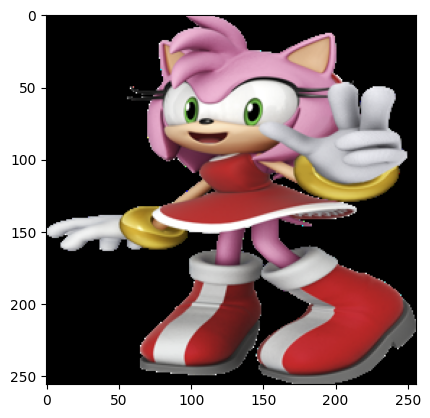

In [124]:
i = 10
print(df.loc[i,'Alignment'])
plt.imshow(X[i]);

In [127]:
def split(X,y,test_split=0.2,val_split=0.2):
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]
    
    first_split = int(len(X) * (test_split+val_split))
    second_split = first_split + int(len(X) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [138]:
X_train, y_train, X_val, y_val, X_test, y_test = split(X,y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((170, 256, 256, 3),
 (170,),
 (85, 256, 256, 3),
 (85,),
 (170, 256, 256, 3),
 (170,))

In [77]:
def load_own_model():

  model = models.Sequential()

  ### Rescaling layer
  model.add(layers.Rescaling(1.0/255, input_shape=(256,256,3)))

  ### First Convolution & MaxPooling
  model.add(layers.Conv2D(16, (10,10), padding='same', activation="relu"))
  model.add(layers.MaxPool2D(pool_size=(3,3)))

  ### Second Convolution & MaxPooling
  model.add(layers.Conv2D(32, (8,8), activation="relu", padding='same'))
  model.add(layers.MaxPool2D(pool_size=(3,3)))

  ### Third Convolution & MaxPooling
  model.add(layers.Conv2D(64, (6,6), activation="relu"))
  model.add(layers.MaxPool2D(pool_size=(2,2)))

  ### Fourth Convolution
  model.add(layers.Conv2D(128, (4,4), activation="relu"))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.25))

  ### Flattening & Dropout
  model.add(layers.Flatten())

  ### One Fully Connected layer & Dropout
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))

  ### Last layer - Classification Layer with 10 outputs
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


  return model

In [139]:
model = load_own_model()
model.summary()

/home/andyw/.pyenv/versions/game_char_cnn/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 16)   │         4,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 85, 85, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 85, 85, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 23, 23, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,809 (1.43 MB)

 Trainable params: 373,809 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
es = EarlyStopping(patience=5)

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_val, y_val),
          shuffle=True,
          verbose=1,
          callbacks=es)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7324 - loss: 0.5270 - val_accuracy: 0.7176 - val_loss: 0.6839
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7522 - loss: 0.5571 - val_accuracy: 0.7176 - val_loss: 0.6667
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6695 - loss: 0.5475 - val_accuracy: 0.7176 - val_loss: 0.7436
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7106 - loss: 0.5129 - val_accuracy: 0.7176 - val_loss: 0.7459
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7068 - loss: 0.4925 - val_accuracy: 0.7176 - val_loss: 0.8407
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6900 - loss: 0.4812 - val_accuracy: 0.7176 - val_loss: 0.9587
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6756 - loss: 0.4892 - val_accuracy: 0.7176 - val_loss: 2.0023
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7803 - loss: 0.4395 - val_accuracy: 0.6588 - v

In [143]:
res = model.evaluate(X_test, y_test)
test_loss = res[0]
test_accuracy = res[1]
print(f"test_loss = {round(test_loss,3)}")
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.6416 - loss: 1.3177
test_loss = 1.382
test_accuracy = 65.0 %


In [175]:
def load_vgg_model():
    from tensorflow.keras.applications.vgg16 import VGG16
    model = VGG16(
            include_top=False,
            weights='imagenet',
            input_tensor=None,
            input_shape=(256,256,3),
            pooling=None,
            classes=1000,
            classifier_activation='sigmoid')
    return model

In [168]:
vgg16_model = load_vgg_model()
vgg16_model.trainable = False
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [169]:

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(128, activation='relu')
    dropout_layer = layers.Dropout(0.3)
    prediction_layer = layers.Dense(1, activation='sigmoid')

    model = models.Sequential([
        model,
        dropout_layer,
        flattening_layer,
        dense_layer,
        dropout_layer,
        prediction_layer
    ])
    return model

In [170]:
vgg16_model = add_last_layers(vgg16_model)
vgg16_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [171]:

def build_model():
    base_model = load_vgg_model()
    base_model.trainable = False
    model = add_last_layers(base_model)

    adam =  optimizers.Adam(learning_rate=1e-4)

    model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

    return model

In [161]:
X_train_sc = preprocess_input(X_train)
X_val_sc = preprocess_input(X_val)
X_test_sc = preprocess_input(X_test)

In [172]:
vgg16_model = build_model()

es = EarlyStopping(patience=5)

history = vgg16_model.fit(X_train_sc, y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_val_sc, y_val),
          shuffle=True,
          verbose=1,
          callbacks=es)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.5913 - loss: 5.9246 - val_accuracy: 0.5765 - val_loss: 4.4403
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.7736 - loss: 2.2691 - val_accuracy: 0.6706 - val_loss: 4.6747
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9211 - loss: 1.1661 - val_accuracy: 0.6824 - val_loss: 6.4005
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.9799 - loss: 0.1133 - val_accuracy: 0.6706 - val_loss: 5.0651
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.9611 - loss: 0.1396 - val_accuracy: 0.6706 - val_loss: 4.5118
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9771 - loss: 0.0919 - val_accuracy: 0.6824 - val_loss: 5.1048


In [173]:
res = vgg16_model.evaluate(X_test, y_test)
test_loss = res[0]
test_accuracy = res[1]
print(f"test_loss = {round(test_loss,3)}")
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.7023 - loss: 4.2610
test_loss = 4.427
test_accuracy = 69.0 %


In [176]:
def load_nas_model():
    from tensorflow.keras.applications.NASNetLarge import NASNetLarge
    model = NASNetLarge(
            include_top=False,
            weights='imagenet',
            input_tensor=None,
            input_shape=(256,256,3),
            pooling=None,
            classes=1000,
            classifier_activation='sigmoid')
    return model


In [211]:
def build_nas_model():
    base_model = load_vgg_model()
    base_model.trainable = False
    model = add_last_layers(base_model)

    adam =  optimizers.Adam(learning_rate=1e-3)

    model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

    return model

In [213]:
nas_model = build_nas_model()

es = EarlyStopping(patience=25)

history = nas_model.fit(X_train_sc, y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_val_sc, y_val),
          shuffle=True,
          verbose=1,
          callbacks=es)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.6047 - loss: 18.7673 - val_accuracy: 0.6000 - val_loss: 6.5978
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.7938 - loss: 2.6109 - val_accuracy: 0.7294 - val_loss: 9.2987
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.8932 - loss: 0.7640 - val_accuracy: 0.5882 - val_loss: 3.6608
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9173 - loss: 0.3834 - val_accuracy: 0.6706 - val_loss: 4.2874
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9751 - loss: 0.0923 - val_accuracy: 0.6471 - val_loss: 3.9381
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.9918 - loss: 0.0468 - val_accuracy: 0.6118 - val_loss: 3.1954
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.9875 - loss: 0.0207 - val_accuracy: 0.6471 - val_loss: 3.4760
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.9965 - loss: 0.0175 - val_accuracy: 0.6471 - 

In [214]:
res = nas_model.evaluate(X_test, y_test)
test_loss = res[0]
test_accuracy = res[1]
print(f"test_loss = {round(test_loss,3)}")
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.6877 - loss: 3.1320
test_loss = 3.633
test_accuracy = 66.0 %


0.0


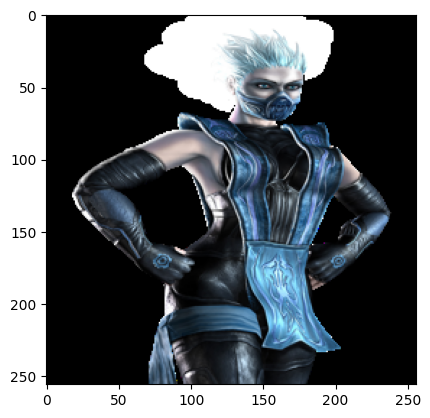

In [210]:
i = 20
print(y_test.tolist()[i])
plt.imshow(X_test[i]);